 # <h1 style='background:#6daa9f; border:0; color:black'><center>HEART FAILURE</center></h1> 
 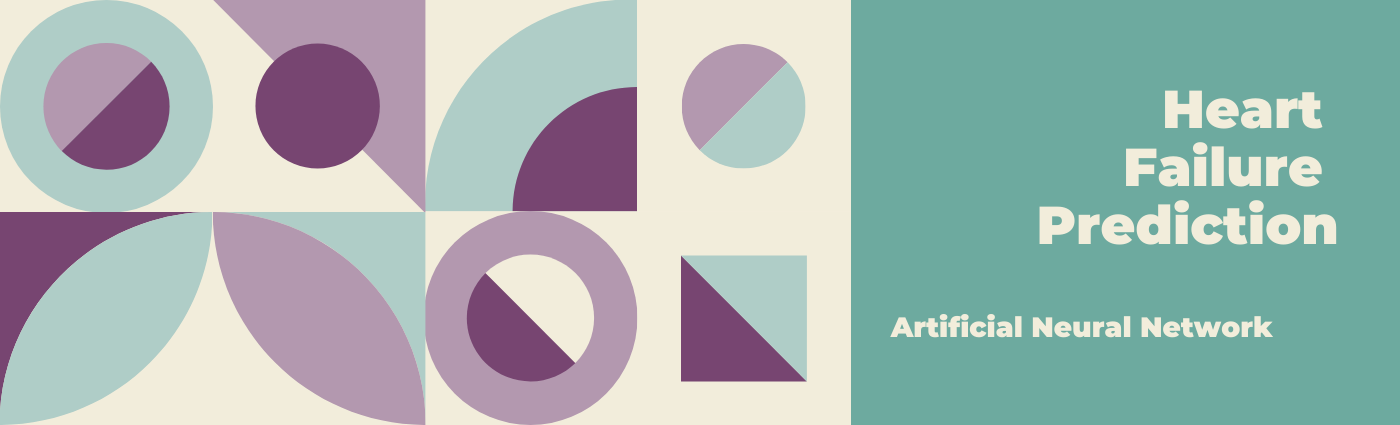

Cardiovascular diseases are the most common cause of deaths globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by Cardiovascular diseases. It is characterized by the heart’s inability to pump an adequate supply of blood to the body. Without sufficient blood flow, all major body functions are disrupted. Heart failure is a condition or a collection of symptoms that weaken the heart. 



# **<span style="color:#6daa9f;">IMPORTING LIBRARIES</span>**


In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.utils import to_categorical

2023-02-22 11:48:55.642284: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# **<span style="color:#6daa9f;">LOADING DATA</span>**

In [2]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**About the data:**

* age: Age of the patient
* anaemia: If the patient had the haemoglobin below the normal range
* creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
* diabetes: If the patient was diabetic
* ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
* high_blood_pressure: If the patient had hypertension
* platelets: Platelet count of blood in kiloplatelets/mL
* serum_creatinine: The level of serum creatinine in the blood in mg/dL
* serum_sodium: The level of serum sodium in the blood in mEq/L
* sex: The sex of the patient
* smoking: If the patient smokes actively or ever did in past
* time: It is the time of the patient's follow-up visit for the disease in months
* DEATH_EVENT: If the patient deceased during the follow-up period


# **<span style="color:#6daa9f;">DATA ANALYSIS</span>**

Steps in data analysis and visulisation:

We begin our analysis by plotting a count plot of the targer attribute. 
A corelation matrix od the various attributes to examine the feature importance.



<Axes: xlabel='DEATH_EVENT', ylabel='count'>

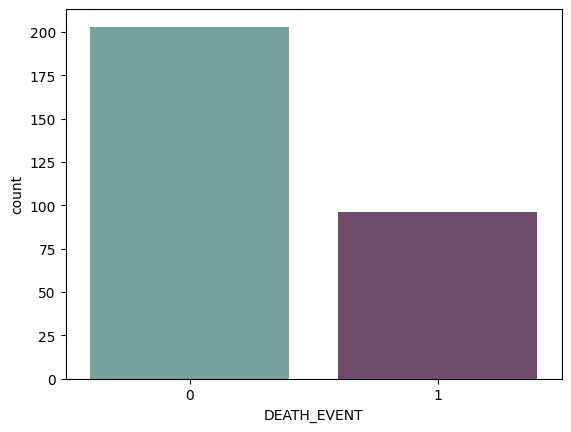

In [4]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

Point to note is that there is an imbalance in the data.

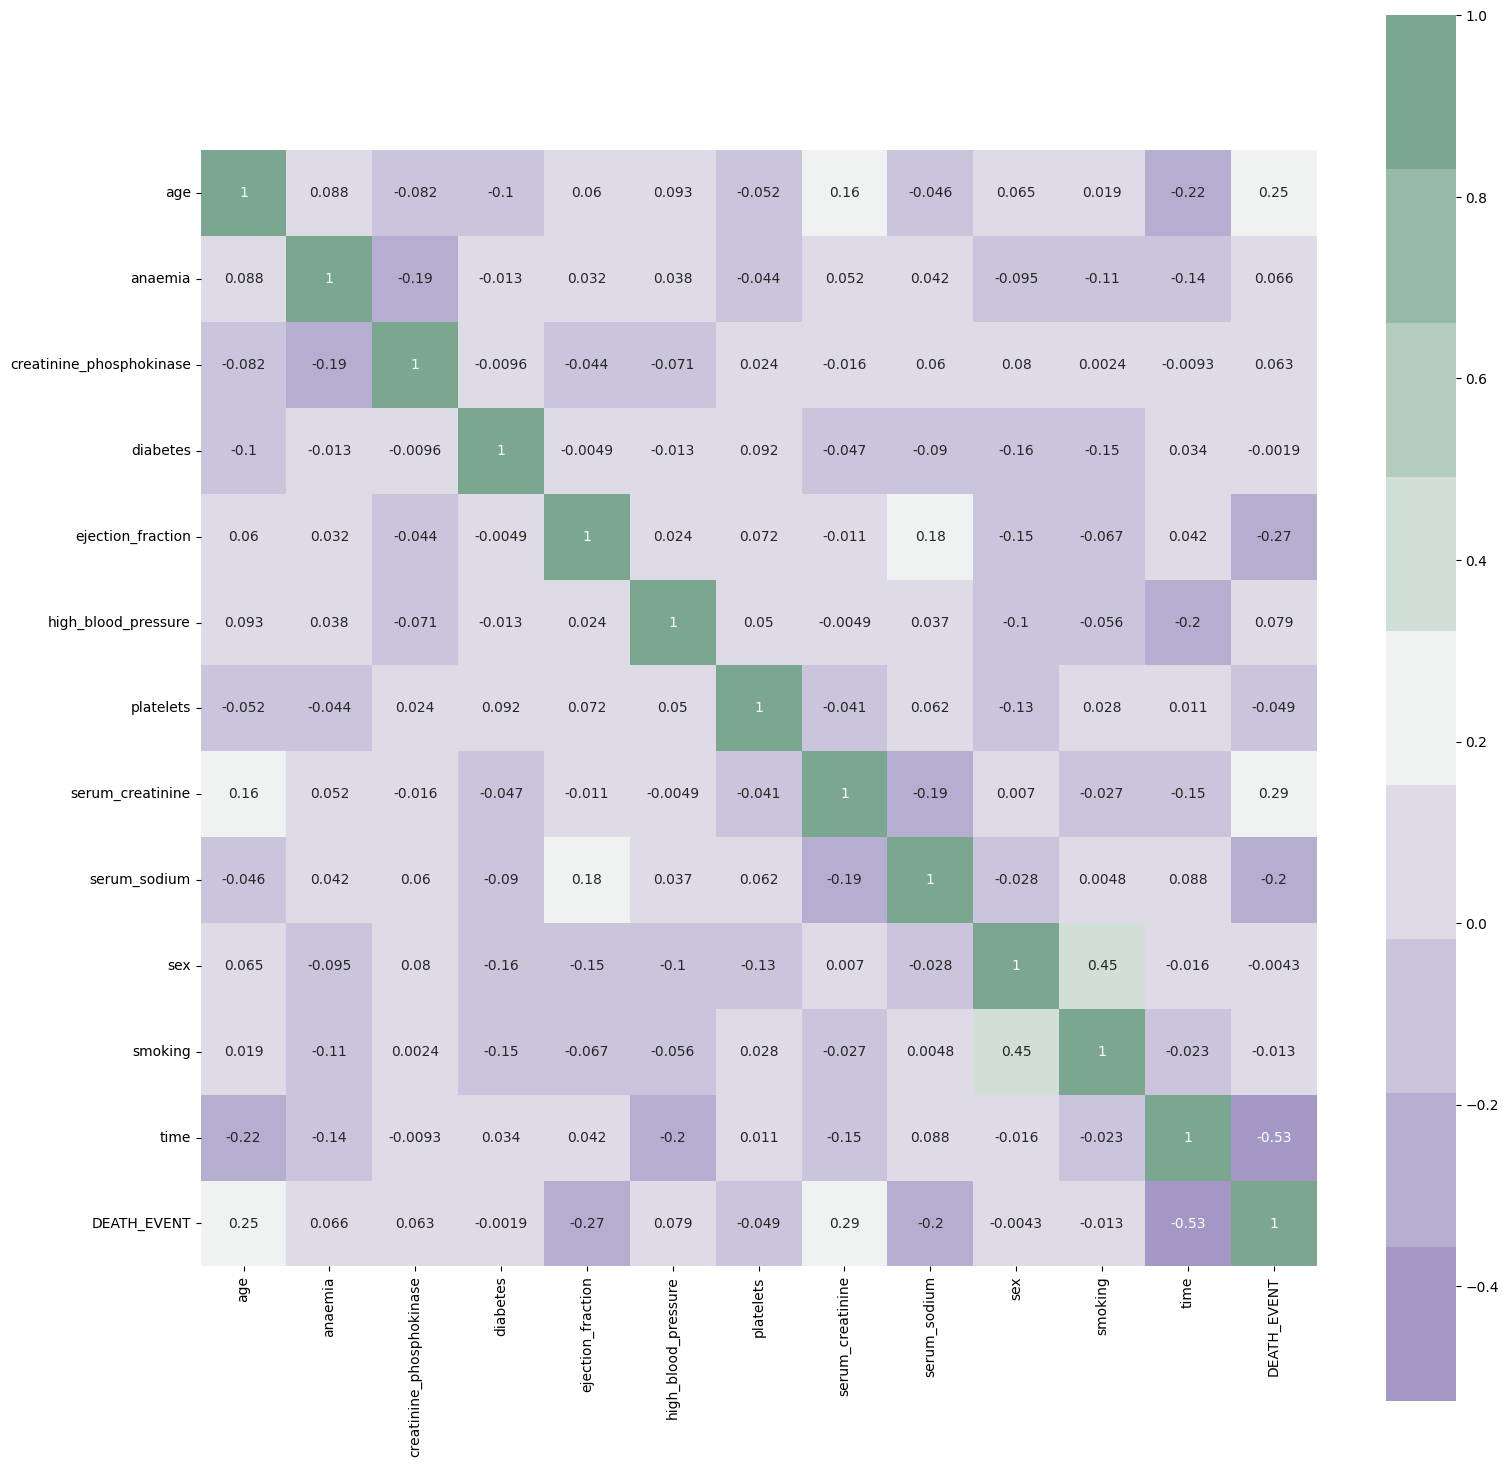

In [5]:
#Examaning a corelation matrix of all the features 
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

**Notable points:**
* Time of the patient's follow-up visit for the disease is crucial in as initial diagnosis with cardiovascular issue and treatment reduces the chances of any fatality. It holds and inverse relation. 
* Ejection fraction is the second most important feature. It is quite expected as it is basically the efficiency of the heart.
* Age of the patient is the third most correlated feature. Clearly as heart's functioning declines with ageing 

**Next, we will examine the count plot of age.**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# **<span style="color:#6daa9f;">DATA PREPROCESSING</span>**

**Steps involved in Data Preprocessing** 
* Dropping the outliers based on data analysis
* Assigning values to features as X and target as y
* Perform the scaling of the features
* Split test and training sets

In [7]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [8]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [9]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
X_train


array([[-7.02231493e-02,  1.14796753e+00,  1.77729885e-01, ...,
         7.35688190e-01, -6.87681906e-01, -5.06694449e-01],
       [ 4.35044203e-01,  1.14796753e+00, -5.26332642e-01, ...,
         7.35688190e-01, -6.87681906e-01, -1.19519289e-01],
       [-1.24918030e+00, -8.71104775e-01,  1.41597644e-01, ...,
        -1.35927151e+00, -6.87681906e-01, -3.00201030e-01],
       ...,
       [ 1.61400136e+00, -8.71104775e-01, -4.47874061e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.38429148e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.65728387e-04, ...,
        -1.35927151e+00, -6.87681906e-01,  7.06454387e-01],
       [-7.02231493e-02,  1.14796753e+00, -5.02588598e-01, ...,
         7.35688190e-01,  1.45416070e+00,  2.03126678e-01]])

In [10]:

def predict(X, y, parameters):
    
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int64)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    # print results
     
    #print ("predictions: " + str(p[0,:]))
    #print ("true labels: " + str(y[0,:]))
    
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0]))))
    
    return p


In [11]:
# GRADED FUNCTION: update_parameters_with_gd

def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Update parameters using one step of gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters to be updated:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients to update each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- the learning rate, scalar.
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for l in range(L):
        ### START CODE HERE ### (approx. 2 lines)
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        ### END CODE HERE ###
        
    return parameters

In [12]:
def backward_propagation(X, Y, cache):
    """
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
  
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

# 1. Binary Classification Loss Functions
Binary Cross-Entropy

Hinge Loss

Squared Hinge Loss


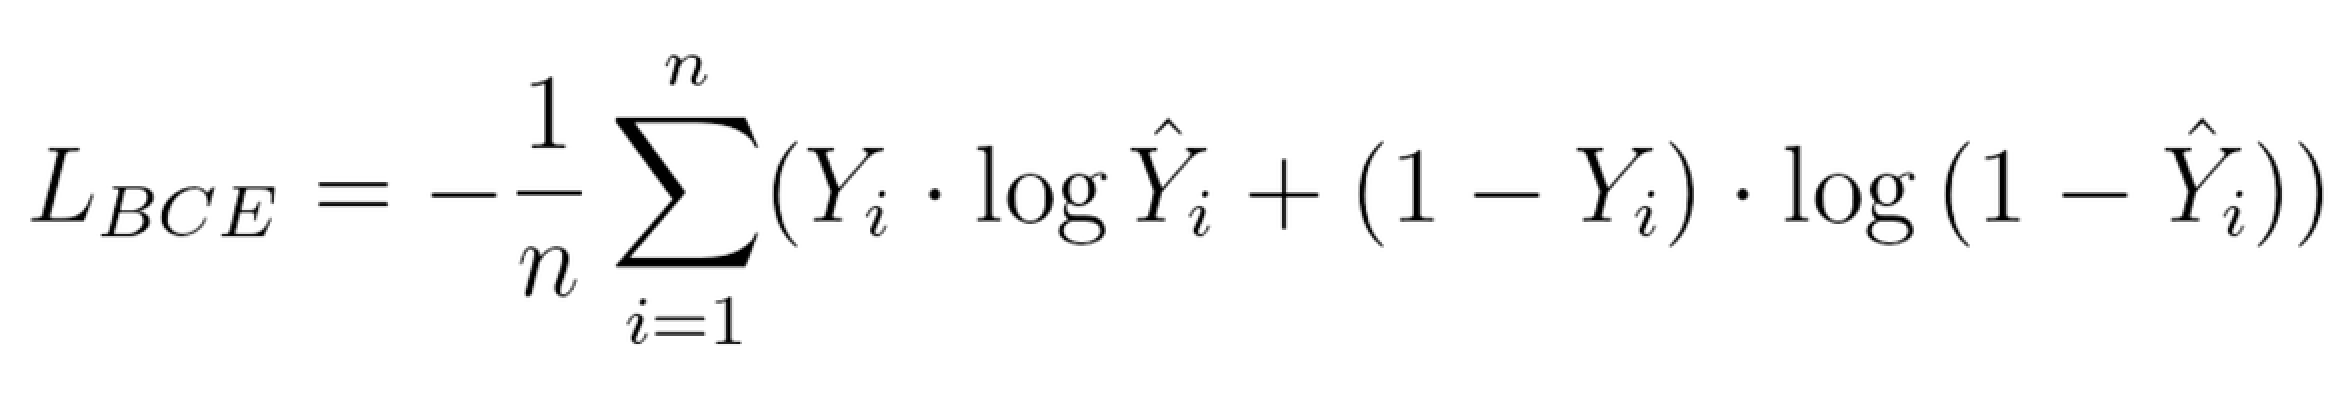

In [13]:
def compute_cost(a3, Y):
    
    """
    Implement the cost function
    
    Arguments:
    a3 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a3
    
    Returns:
    cost - value of the cost function
    """
    m = Y.shape[1]
 
    
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    return cost

In [14]:
def relu(x):
   
    s = np.maximum(0,x)
    
    return s

In [15]:
def sigmoid(x):
    
    s = 1/(1+np.exp(-x))
    return s

In [16]:

def forward_propagation(X, parameters):
    """
    Implements the forward propagation (and computes the loss) presented in Figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
    
    Returns:
    loss -- the loss function (vanilla logistic loss)
    """
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
    return a3, cache


In [17]:
# GRADED FUNCTION: random_mini_batches

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))   
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[permutation].reshape((1, m))
    

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : ]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : ]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [18]:
def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    b1 -- bias vector of shape (layer_dims[l], 1)
                    Wl -- weight matrix of shape (layer_dims[l-1], layer_dims[l])
                    bl -- bias vector of shape (1, layer_dims[l])
                    
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*  np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert (parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
        assert (parameters['W' + str(l)].shape == layer_dims[l], 1)
        
    return parameters

<>:23: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:24: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:23: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:24: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_17866/3538480365.py:23: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_17866/3538480365.py:24: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (parameters['W' + str(l)].shape == layer_dims[l], 1)


In [19]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.001, mini_batch_size =64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 1000, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost
            cost = compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
        # Print the cost every 1000 epoch
        if print_cost and i % 1 == 0:
            print ("Cost after epoch %i: %f" %(i, cost))
        if print_cost and i % 1 == 0:
            costs.append(cost)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

## Mini-batch gradient descent

Cost after epoch 0: 0.728684
Cost after epoch 1: 0.720465
Cost after epoch 2: 0.712416
Cost after epoch 3: 0.704533
Cost after epoch 4: 0.696815
Cost after epoch 5: 0.689257
Cost after epoch 6: 0.683118
Cost after epoch 7: 0.677616
Cost after epoch 8: 0.672192
Cost after epoch 9: 0.666846
Cost after epoch 10: 0.661580
Cost after epoch 11: 0.656393
Cost after epoch 12: 0.651288
Cost after epoch 13: 0.646265
Cost after epoch 14: 0.641324
Cost after epoch 15: 0.636467
Cost after epoch 16: 0.631693
Cost after epoch 17: 0.627005
Cost after epoch 18: 0.622401
Cost after epoch 19: 0.617883
Cost after epoch 20: 0.613450
Cost after epoch 21: 0.609104
Cost after epoch 22: 0.604844
Cost after epoch 23: 0.600670
Cost after epoch 24: 0.596582
Cost after epoch 25: 0.592579
Cost after epoch 26: 0.588663
Cost after epoch 27: 0.584831
Cost after epoch 28: 0.581084
Cost after epoch 29: 0.577421
Cost after epoch 30: 0.573842
Cost after epoch 31: 0.570344
Cost after epoch 32: 0.566928
Cost after epoch 33:

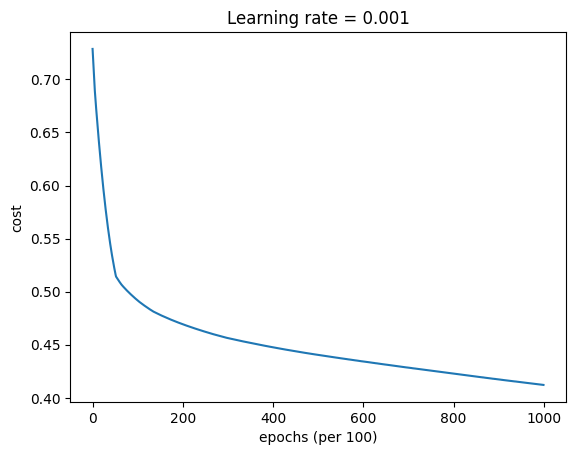

Accuracy: 0.5


In [20]:
# train 4-layer model
layers_dims = [X_train.shape[0], 5,3, 1]
parameters = model(X_train, y_train, layers_dims, optimizer = "gd")

# Predict
predictions = predict(X_train, y_train, parameters)

# Mini-batch gradient descent with momentum

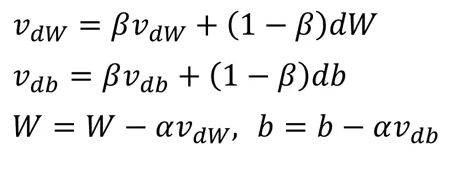

In [21]:
# GRADED FUNCTION: update_parameters_with_momentum

def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Update parameters using Momentum
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- python dictionary containing the current velocity:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- the momentum hyperparameter, scalar
    learning_rate -- the learning rate, scalar
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- python dictionary containing your updated velocities
    """

    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Momentum update for each parameter
    for l in range(L):
        
        ### START CODE HERE ### (approx. 4 lines)
        # compute velocities
        v["dW" + str(l+1)] = beta * v["dW" + str(l+1)] + (1 - beta) * grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta * v["db" + str(l+1)] + (1 - beta) * grads["db" + str(l+1)]
        # update parameters
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v["db" + str(l+1)]
        ### END CODE HERE ###
        
    return parameters, v

In [22]:
# GRADED FUNCTION: initialize_velocity

def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Returns:
    v -- python dictionary containing the current velocity.
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(L):
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = np.zeros(parameters["W"+str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters["b"+str(l+1)].shape)
        ### END CODE HERE ###
        
    return v

Cost after epoch 0: 0.882108
Cost after epoch 1: 0.878305
Cost after epoch 2: 0.871125
Cost after epoch 3: 0.860987
Cost after epoch 4: 0.848296
Cost after epoch 5: 0.833436
Cost after epoch 6: 0.816764
Cost after epoch 7: 0.798603
Cost after epoch 8: 0.782427
Cost after epoch 9: 0.766287
Cost after epoch 10: 0.749210
Cost after epoch 11: 0.731330
Cost after epoch 12: 0.712777
Cost after epoch 13: 0.693644
Cost after epoch 14: 0.674064
Cost after epoch 15: 0.654210
Cost after epoch 16: 0.634221
Cost after epoch 17: 0.614248
Cost after epoch 18: 0.594457
Cost after epoch 19: 0.575026
Cost after epoch 20: 0.556148
Cost after epoch 21: 0.538021
Cost after epoch 22: 0.520843
Cost after epoch 23: 0.504798
Cost after epoch 24: 0.490036
Cost after epoch 25: 0.476667
Cost after epoch 26: 0.464739
Cost after epoch 27: 0.454246
Cost after epoch 28: 0.452072
Cost after epoch 29: 0.451277
Cost after epoch 30: 0.450311
Cost after epoch 31: 0.449346
Cost after epoch 32: 0.448414
Cost after epoch 33:

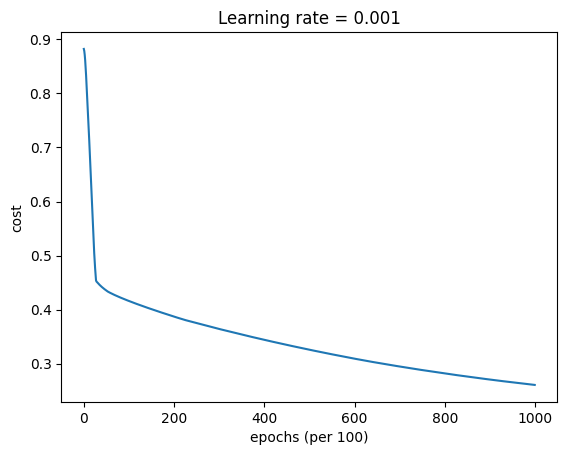

Accuracy: 0.4166666666666667


In [23]:
# train 3-layer model
layers_dims = [X_train.shape[0], 5, 2, 1]
parameters = model(X_train, y_train, layers_dims, beta = 0.9, optimizer = "momentum")

# Predict
predictions = predict(X_train, y_train, parameters)

# Mini-batch with Adam mode

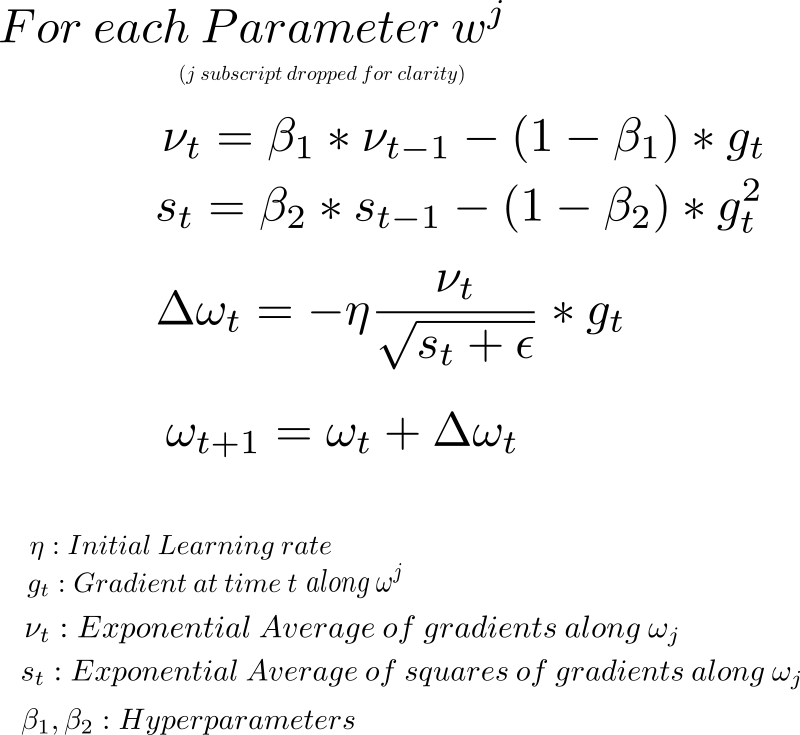

In [24]:
# GRADED FUNCTION: update_parameters_with_adam

def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1 - beta1) * grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1 - beta1) * grads["db" + str(l+1)]
        ### END CODE HERE ###

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 - beta1)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - beta1)
        ### END CODE HERE ###

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        ### START CODE HERE ### (approx. 2 lines)
        s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1 - beta2) * (grads["dW" + str(l+1)] * grads["dW" + str(l+1)])
        s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1 - beta2) * (grads["db" + str(l+1)] * grads["db" + str(l+1)])
        ### END CODE HERE ###

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1 - beta2)
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1 - beta2)
        ### END CODE HERE ###

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        ### START CODE HERE ### (approx. 2 lines)
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v_corrected["dW" + str(l+1)] / (np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon)
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v_corrected["db" + str(l+1)] / (np.sqrt(s_corrected["db" + str(l+1)]) + epsilon)
        ### END CODE HERE ###

    return parameters, v, s

In [25]:
# GRADED FUNCTION: initialize_adam

def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(L):
    ### START CODE HERE ### (approx. 4 lines)
        v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)    
    ### END CODE HERE ###
    
    return v, s

Cost after epoch 0: 0.882108
Cost after epoch 1: 0.767318
Cost after epoch 2: 0.633428
Cost after epoch 3: 0.501604
Cost after epoch 4: 0.428852
Cost after epoch 5: 0.414551
Cost after epoch 6: 0.399614
Cost after epoch 7: 0.385030
Cost after epoch 8: 0.371481
Cost after epoch 9: 0.359023
Cost after epoch 10: 0.347252
Cost after epoch 11: 0.336170
Cost after epoch 12: 0.325721
Cost after epoch 13: 0.315877
Cost after epoch 14: 0.306630
Cost after epoch 15: 0.297968
Cost after epoch 16: 0.289903
Cost after epoch 17: 0.283120
Cost after epoch 18: 0.276461
Cost after epoch 19: 0.269514
Cost after epoch 20: 0.263804
Cost after epoch 21: 0.258478
Cost after epoch 22: 0.253518
Cost after epoch 23: 0.248906
Cost after epoch 24: 0.244625
Cost after epoch 25: 0.240662
Cost after epoch 26: 0.236995
Cost after epoch 27: 0.233600
Cost after epoch 28: 0.230992
Cost after epoch 29: 0.227743
Cost after epoch 30: 0.225188
Cost after epoch 31: 0.223667
Cost after epoch 32: 0.220590
Cost after epoch 33:

Cost after epoch 705: 0.162812
Cost after epoch 706: 0.162805
Cost after epoch 707: 0.162797
Cost after epoch 708: 0.162789
Cost after epoch 709: 0.162782
Cost after epoch 710: 0.162774
Cost after epoch 711: 0.162767
Cost after epoch 712: 0.162759
Cost after epoch 713: 0.162752
Cost after epoch 714: 0.162745
Cost after epoch 715: 0.162737
Cost after epoch 716: 0.162730
Cost after epoch 717: 0.162722
Cost after epoch 718: 0.162715
Cost after epoch 719: 0.162708
Cost after epoch 720: 0.162700
Cost after epoch 721: 0.162693
Cost after epoch 722: 0.162686
Cost after epoch 723: 0.162678
Cost after epoch 724: 0.162671
Cost after epoch 725: 0.162664
Cost after epoch 726: 0.162657
Cost after epoch 727: 0.162649
Cost after epoch 728: 0.162642
Cost after epoch 729: 0.162635
Cost after epoch 730: 0.162628
Cost after epoch 731: 0.162621
Cost after epoch 732: 0.162614
Cost after epoch 733: 0.162606
Cost after epoch 734: 0.162599
Cost after epoch 735: 0.162592
Cost after epoch 736: 0.162585
Cost aft

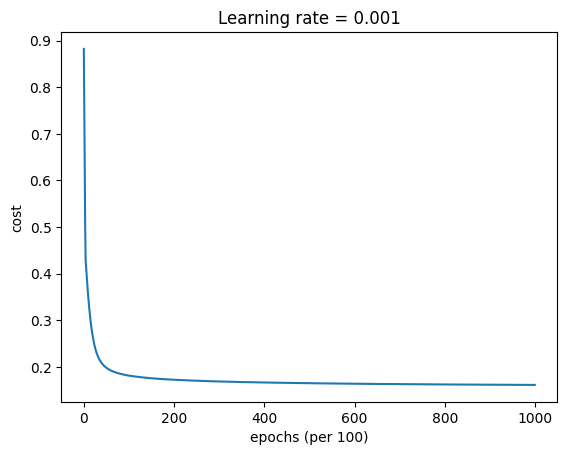

Accuracy: 0.6666666666666666


In [26]:
# train 3-layer model
layers_dims = [X_train.shape[0], 5, 2, 1]
parameters = model(X_train, y_train, layers_dims, optimizer = "adam")

# Predict
predictions = predict(X_train, y_train, parameters)

# Model performance without  Tensorflow in MacOs

CPU Usage: 54.7%
No GPU found
Memory Usage: 422.70 MB

Cost after epoch 0: 0.882108
Cost after epoch 1: 0.767318
Cost after epoch 2: 0.633428
Cost after epoch 3: 0.501604
Cost after epoch 4: 0.428852
Cost after epoch 5: 0.414551
Cost after epoch 6: 0.399614
Cost after epoch 7: 0.385030
Cost after epoch 8: 0.371481
Cost after epoch 9: 0.359023
Cost after epoch 10: 0.347252
Cost after epoch 11: 0.336170
Cost after epoch 12: 0.325721
Cost after epoch 13: 0.315877
Cost after epoch 14: 0.306630
Cost after epoch 15: 0.297968
Cost after epoch 16: 0.289903
Cost after epoch 17: 0.283120
Cost after epoch 18: 0.276461
Cost after epoch 19: 0.269514
Cost after epoch 20: 0.263804
Cost after epoch 21: 0.258478
Cost after epoch 22: 0.253518
Cost after epoch 23: 0.248906
Cost after epoch 24: 0.244625
Cost after epoch 25: 0.240662
Cost after epoch 26: 0.236995
Cost after epoch 27: 0.233600
Cost after epoch 28: 0.230992
Cost after epoch 29: 0.227743
Cost after epoch 30: 0.225188
Cost after epoch 31: 0.22

Cost after epoch 663: 0.163147
Cost after epoch 664: 0.163139
Cost after epoch 665: 0.163131
Cost after epoch 666: 0.163122
Cost after epoch 667: 0.163114
Cost after epoch 668: 0.163106
Cost after epoch 669: 0.163097
Cost after epoch 670: 0.163089
Cost after epoch 671: 0.163081
Cost after epoch 672: 0.163073
Cost after epoch 673: 0.163064
Cost after epoch 674: 0.163056
Cost after epoch 675: 0.163048
Cost after epoch 676: 0.163040
Cost after epoch 677: 0.163032
Cost after epoch 678: 0.163024
Cost after epoch 679: 0.163016
Cost after epoch 680: 0.163008
Cost after epoch 681: 0.163000
Cost after epoch 682: 0.162992
Cost after epoch 683: 0.162984
Cost after epoch 684: 0.162976
Cost after epoch 685: 0.162968
Cost after epoch 686: 0.162960
Cost after epoch 687: 0.162952
Cost after epoch 688: 0.162944
Cost after epoch 689: 0.162936
Cost after epoch 690: 0.162928
Cost after epoch 691: 0.162920
Cost after epoch 692: 0.162912
Cost after epoch 693: 0.162905
Cost after epoch 694: 0.162897
Cost aft

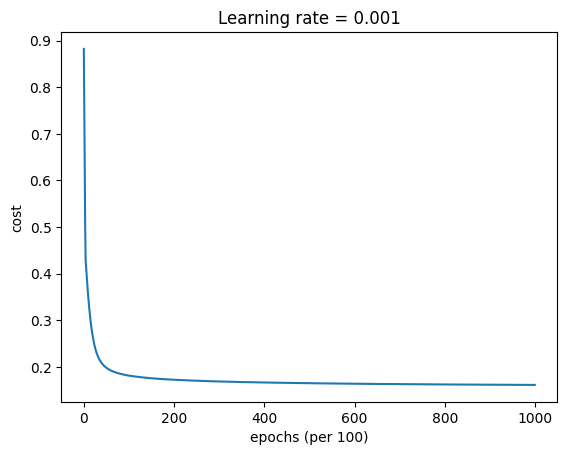

Accuracy: 0.6666666666666666
Time Taken: 0.41 seconds


In [27]:
# Measure CPU usage
import psutil
import tensorflow as tf
import time

cpu_percent = psutil.cpu_percent(interval=None)
print("CPU Usage: {}%".format(cpu_percent))

# Measure GPU usage
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print("GPU Name:", gpu.name)
        print("GPU Memory:", gpu.memory_limit)
        print("GPU Usage:")
        print(tf.raw_ops.GPUUsage(gpu_name=gpu.name))
else:
        print("No GPU found")

# Measure memory usage
process = psutil.Process()
memory_info = process.memory_info()
print("Memory Usage: {:.2f} MB".format(memory_info.rss / 1024 / 1024))

# Measure time taken for training
start_time = time.time()
print()

layers_dims = [X_train.shape[0], 5, 2, 1]
parameters = model(X_train, y_train, layers_dims, optimizer = "adam")
predictions=predict(X_train, y_train, parameters)

end_time = time.time()
print("Time Taken: {:.2f} seconds".format(end_time - start_time))